## H20 AutoML Indian Hotels on Goibibo

## Abstract
The goal is to create a precise model for forecasting hotel ratings on Goibibo, despite the multitude of contributing factors. The initial phase involved identifying the key factors that affect hotel prices, followed by developing a regression model to predict these prices. The model was then evaluated using the Hotels on Goibibo dataset, and after analyzing the data, it was observed that the regression model was capable of effectively predicting and analyzing hotel prices to a certain degree. However, more advanced machine learning techniques could potentially enhance the algorithm's performance further.

Variable Description
Address: The physical address of the hotel, including street name, number, and any other relevant details.

Area: The sub-city region where the hotel is located geographically.

city: The city where the hotel is located.

guest_recommendation: The number of guests who have stayed at this hotel and recommended it to others on the website.

latitude: The geographical latitude of the hotel's location.

longitude: The geographical longitude of the hotel's location.

property_id: A unique identifier assigned to the hotel.

property_name: The name of the hotel.

property_type: The type of property, which is typically a hotel.

room_count: The total number of rooms available for guests at the hotel.

room_type: The type of room available for guests at the hotel.

site_review_count: The number of reviews left on the website by users for this hotel.

site_review_rating: The overall rating given by users for this hotel on the website.

state: The state or province where the hotel is located.

uniq_id: A unique identifier assigned to each hotel on the website.

## Importing required Libraries and H20 Initialization
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.4 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
     

In [4]:

min_mem_size=6 
run_time=222

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
     

6


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:35931..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxmx0m83e
  JVM stdout: /tmp/tmpxmx0m83e/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxmx0m83e/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:35931
Connecting to H2O server at http://127.0.0.1:35931 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_56r010
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:35931
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

In [7]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/BhavanishDhamnaskar/test/main/goibibo_com-travel_new.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/BhavanishDhamnaskar/test/main/goibibo_com-travel_new.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
dff.head(5)

address            area     city  \
0  15th Mile, N.H.21,Manali, District Kullu,Himac...          Others   Manali   
1  A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...     Sushant Lok  Gurgaon   
2  Cobra Vaddo,Calungate Baga Road, Bardez, Calan...  Calangute Area      Goa   
3                                              Simsa   Village Simsa   Manali   
4         8180 Street No.-6,Arakashan Road,Paharganj       Paharganj    Delhi   

   guest_recommendation                                  hotel_description  \
0                    85  The standard check-in time is 12:00 PM and the...   
1                    87  The standard check-in time is 12:00 PM and the...   
2                    50  The standard check-in time is 12:00 PM and the...   
3                   100  The standard check-in time is 12:00 PM and the...   
4                    63  The standard check-in time is 12:00 PM and the...   

                                    hotel_facilities   latitude  \
0  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.139387   
1  Airport Transfer Available / Surcharge|Banquet...  28.472097   
2  Swimming Pool|Bar / Lounge |Laundry Service Av...  15.548398   
3  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.223603   
4  Internet Access - Surcharge|Laundry Service Av...  28.646777   

         locality  longitude       property_id        property_name  \
0          Others  77.154660  HTLGBO1000016238     Baragarh Regency   
1     Sushant Lok  77.072546  HTLGBO1000015822  Asian Suites A- 585   
2  Calangute Area  73.757634  HTLGBO1000004551        Bevvan Resort   
3   Village Simsa  77.185900  HTLGBO1000007993    Apple Inn Cottage   
4       Paharganj  77.212735  HTLGBO1000008281  Anmol Hotel Pvt.Ltd   

  property_type province  room_count                   room_type  \
0        Resort   Manali          17                 Deluxe Room   
1   Guest House  Gurgaon          18  Deluxe Room With Free WIFI   
2        Resort      Goa          15               Standard Room   
3       Cottage   Manali          24                 Deluxe Room   
4         Hotel    Delhi          20        Standard Room Non AC   

   site_review_count  site_review_rating             state  \
0                 87                 4.0  Himachal Pradesh   
1                  8                 4.5           Haryana   
2                  2                 2.5               Goa   
3                  1                 5.0  Himachal Pradesh   
4                121                 2.8             Delhi   

                            uniq_id  
0  2c8db027d43a9452a43e88eb30d9f983  
1  e98f69f889c0235e6dc480e7df6de0de  
2  9b59d00eaffc273d83000ed7dcda0e83  
3  df0971f9c5501af112485ee28b468ce5  
4  0c3514344c9cda8718f558e84bdb44ef

In [9]:
#Dropping the columns that is not needed for creating predective model

dff.drop('province', axis=1 , inplace=True)
dff.drop('locality', axis=1, inplace=True)
#dff.drop('address', axis=1, inplace=True)
#dff.drop('hotel_description', axis=1, inplace=True)
#dff.drop('hotel_facilities', axis=1, inplace=True)

In [10]:
#Gettig the list of numerical features
num_cols = dff._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['guest_recommendation', 'latitude', 'longitude', 'room_count',
        'site_review_count', 'site_review_rating'],
       dtype='object'), 6)

In [11]:
#Gettig the list of categorical features
cat_cols = dff.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['address',
  'area',
  'city',
  'hotel_description',
  'hotel_facilities',
  'property_id',
  'property_name',
  'property_type',
  'room_type',
  'state',
  'uniq_id'],
 11)

In [12]:
# converting categorical features into numerical
for cat_col in cat_cols:
  classes = list(np.unique(dff[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  dff[cat_col].replace(classes, tokens, inplace=True)

In [13]:
dff.head()

address  area  city  guest_recommendation  hotel_description  \
0      164   585   214                    85                723   
1      546   798   120                    87                778   
2      830   108   113                    50                510   
3     2017   877   214                   100                723   
4      493   591    87                    63               1262   

   hotel_facilities   latitude  longitude  property_id  property_name  \
0              1132  32.139387  77.154660         1278             43   
1               141  28.472097  77.072546         1268             24   
2              2146  15.548398  73.757634          480             50   
3              1152  32.223603  77.185900          789             13   
4              1620  28.646777  77.212735          810              8   

   property_type  room_count  room_type  site_review_count  \
0             13          17        241                 87   
1              5          18        261                  8   
2             13          15        695                  2   
3              3          24        241                  1   
4              8          20        709                121   

   site_review_rating  state  uniq_id  
0                 4.0     10      396  
1                 4.5      9     2116  
2                 2.5      7     1385  
3                 5.0     10     2013  
4                 2.8      6      115

In [14]:
dff.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

address                 0
area                    0
city                    0
guest_recommendation    0
hotel_description       0
hotel_facilities        0
latitude                0
longitude               0
property_id             0
property_name           0
property_type           0
room_count              0
room_type               0
site_review_count       0
site_review_rating      0
state                   0
uniq_id                 0
dtype: int64

In [15]:
dff.describe()  # Statistical description of our dataset

address         area         city  guest_recommendation  \
count  2302.000000  2302.000000  2302.000000           2302.000000   
mean   1148.859687   448.908341   164.575586             75.976977   
std     663.245513   258.398243   102.630416             22.060363   
min       0.000000     0.000000     0.000000              0.000000   
25%     575.250000   211.000000    86.000000             68.000000   
50%    1149.500000   460.000000   143.000000             80.000000   
75%    1722.750000   639.750000   248.000000             90.000000   
max    2297.000000   918.000000   361.000000            100.000000   

       hotel_description  hotel_facilities     latitude    longitude  \
count        2302.000000       2302.000000  2302.000000  2302.000000   
mean          716.264553       1121.462641    21.477707    77.385076   
std           366.671713        636.455640     7.543358     4.477159   
min             0.000000          0.000000     8.080476    12.939682   
25%           429.000000        573.250000    15.208563    74.640032   
50%           723.000000       1139.500000    22.516101    77.056976   
75%          1017.000000       1657.750000    28.443529    78.154690   
max          1370.000000       2228.000000    79.464811    94.911962   

       property_id  property_name  property_type   room_count    room_type  \
count  2302.000000    2302.000000    2302.000000  2302.000000  2302.000000   
mean   1150.500000    1093.726325       8.735882    29.614683   418.634666   
std     664.674482     624.362846       2.687507   125.602858   231.087313   
min       0.000000       0.000000       0.000000     0.000000     0.000000   
25%     575.250000     571.250000       8.000000    10.000000   241.000000   
50%    1150.500000    1075.500000       8.000000    20.000000   380.000000   
75%    1725.750000    1631.750000       8.000000    32.750000   671.750000   
max    2301.000000    2197.000000      16.000000  5874.000000   834.000000   

       site_review_count  site_review_rating        state      uniq_id  
count        2302.000000         2302.000000  2302.000000  2302.000000  
mean           48.876195            3.769983    14.800174  1150.500000  
std            94.350157            0.819890     6.906845   664.674482  
min             0.000000            0.000000     0.000000     0.000000  
25%             4.000000            3.400000     9.000000   575.250000  
50%            17.000000            4.000000    14.000000  1150.500000  
75%            57.000000            4.300000    21.000000  1725.750000  
max          2094.000000            5.000000    26.000000  2301.000000

In [16]:
dff.corr() #Calculating correlation matrix for all variables

address      area      city  guest_recommendation  \
address               1.000000  0.114702  0.132766             -0.012108   
area                  0.114702  1.000000  0.092166              0.031544   
city                  0.132766  0.092166  1.000000              0.028441   
guest_recommendation -0.012108  0.031544  0.028441              1.000000   
hotel_description    -0.039966  0.005827  0.003127             -0.065130   
hotel_facilities      0.100397  0.045025  0.036372              0.019865   
latitude              0.080850  0.099755  0.026101             -0.041128   
longitude            -0.007714  0.026015  0.027888             -0.067413   
property_id           0.016971  0.023608  0.012653              0.042410   
property_name         0.025922  0.041141  0.018916              0.029328   
property_type         0.092282  0.064665  0.055275              0.028896   
room_count            0.027455 -0.000278 -0.008341              0.011002   
room_type            -0.030963  0.004184  0.023042              0.015102   
site_review_count    -0.038499 -0.047548  0.000700              0.075590   
site_review_rating   -0.000085 -0.003676  0.022095              0.544301   
state                -0.011777  0.061504  0.049393             -0.012492   
uniq_id               0.031303 -0.031552 -0.009771             -0.005524   

                      hotel_description  hotel_facilities  latitude  \
address                       -0.039966          0.100397  0.080850   
area                           0.005827          0.045025  0.099755   
city                           0.003127          0.036372  0.026101   
guest_recommendation          -0.065130          0.019865 -0.041128   
hotel_description              1.000000         -0.150461  0.150035   
hotel_facilities              -0.150461          1.000000 -0.100799   
latitude                       0.150035         -0.100799  1.000000   
longitude                      0.095467         -0.046937 -0.017601   
property_id                    0.014461          0.094480  0.024596   
property_name                 -0.001562         -0.017063  0.002933   
property_type                 -0.129235          0.194086 -0.135767   
room_count                     0.014304         -0.011543  0.001598   
room_type                      0.013576          0.029341 -0.010463   
site_review_count             -0.034609         -0.075554 -0.028052   
site_review_rating            -0.117650         -0.019283 -0.047139   
state                          0.009391          0.010614  0.085554   
uniq_id                       -0.021154         -0.000781 -0.006163   

                      longitude  property_id  property_name  property_type  \
address               -0.007714     0.016971       0.025922       0.092282   
area                   0.026015     0.023608       0.041141       0.064665   
city                   0.027888     0.012653       0.018916       0.055275   
guest_recommendation  -0.067413     0.042410       0.029328       0.028896   
hotel_description      0.095467     0.014461      -0.001562      -0.129235   
hotel_facilities      -0.046937     0.094480      -0.017063       0.194086   
latitude              -0.017601     0.024596       0.002933      -0.135767   
longitude              1.000000     0.015985      -0.013364      -0.023331   
property_id            0.015985     1.000000       0.036398      -0.146997   
property_name         -0.013364     0.036398       1.000000      -0.029411   
property_type         -0.023331    -0.146997      -0.029411       1.000000   
room_count            -0.033816    -0.040274       0.032709       0.051145   
room_type              0.000717    -0.001849       0.045945      -0.030351   
site_review_count     -0.011808    -0.250584       0.020175       0.002978   
site_review_rating    -0.057932    -0.114912       0.060066       0.046064   
state                  0.139740    -0.056598      -0.008530       0.064163   
uniq_id                0.024190     0.005082     

#Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

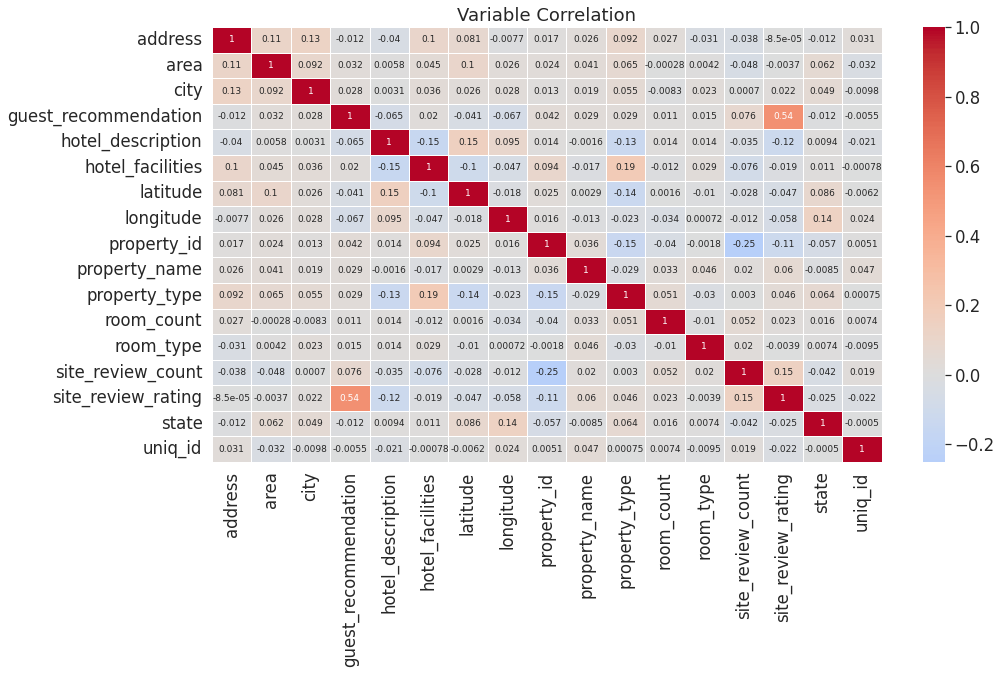

In [17]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(15,8))

sns.heatmap(dff.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')
     

# Correlation Analysis
Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low to high .

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

From the Above Matrix we can conclude that guest_recommendation and site_review_rating is highly correlated



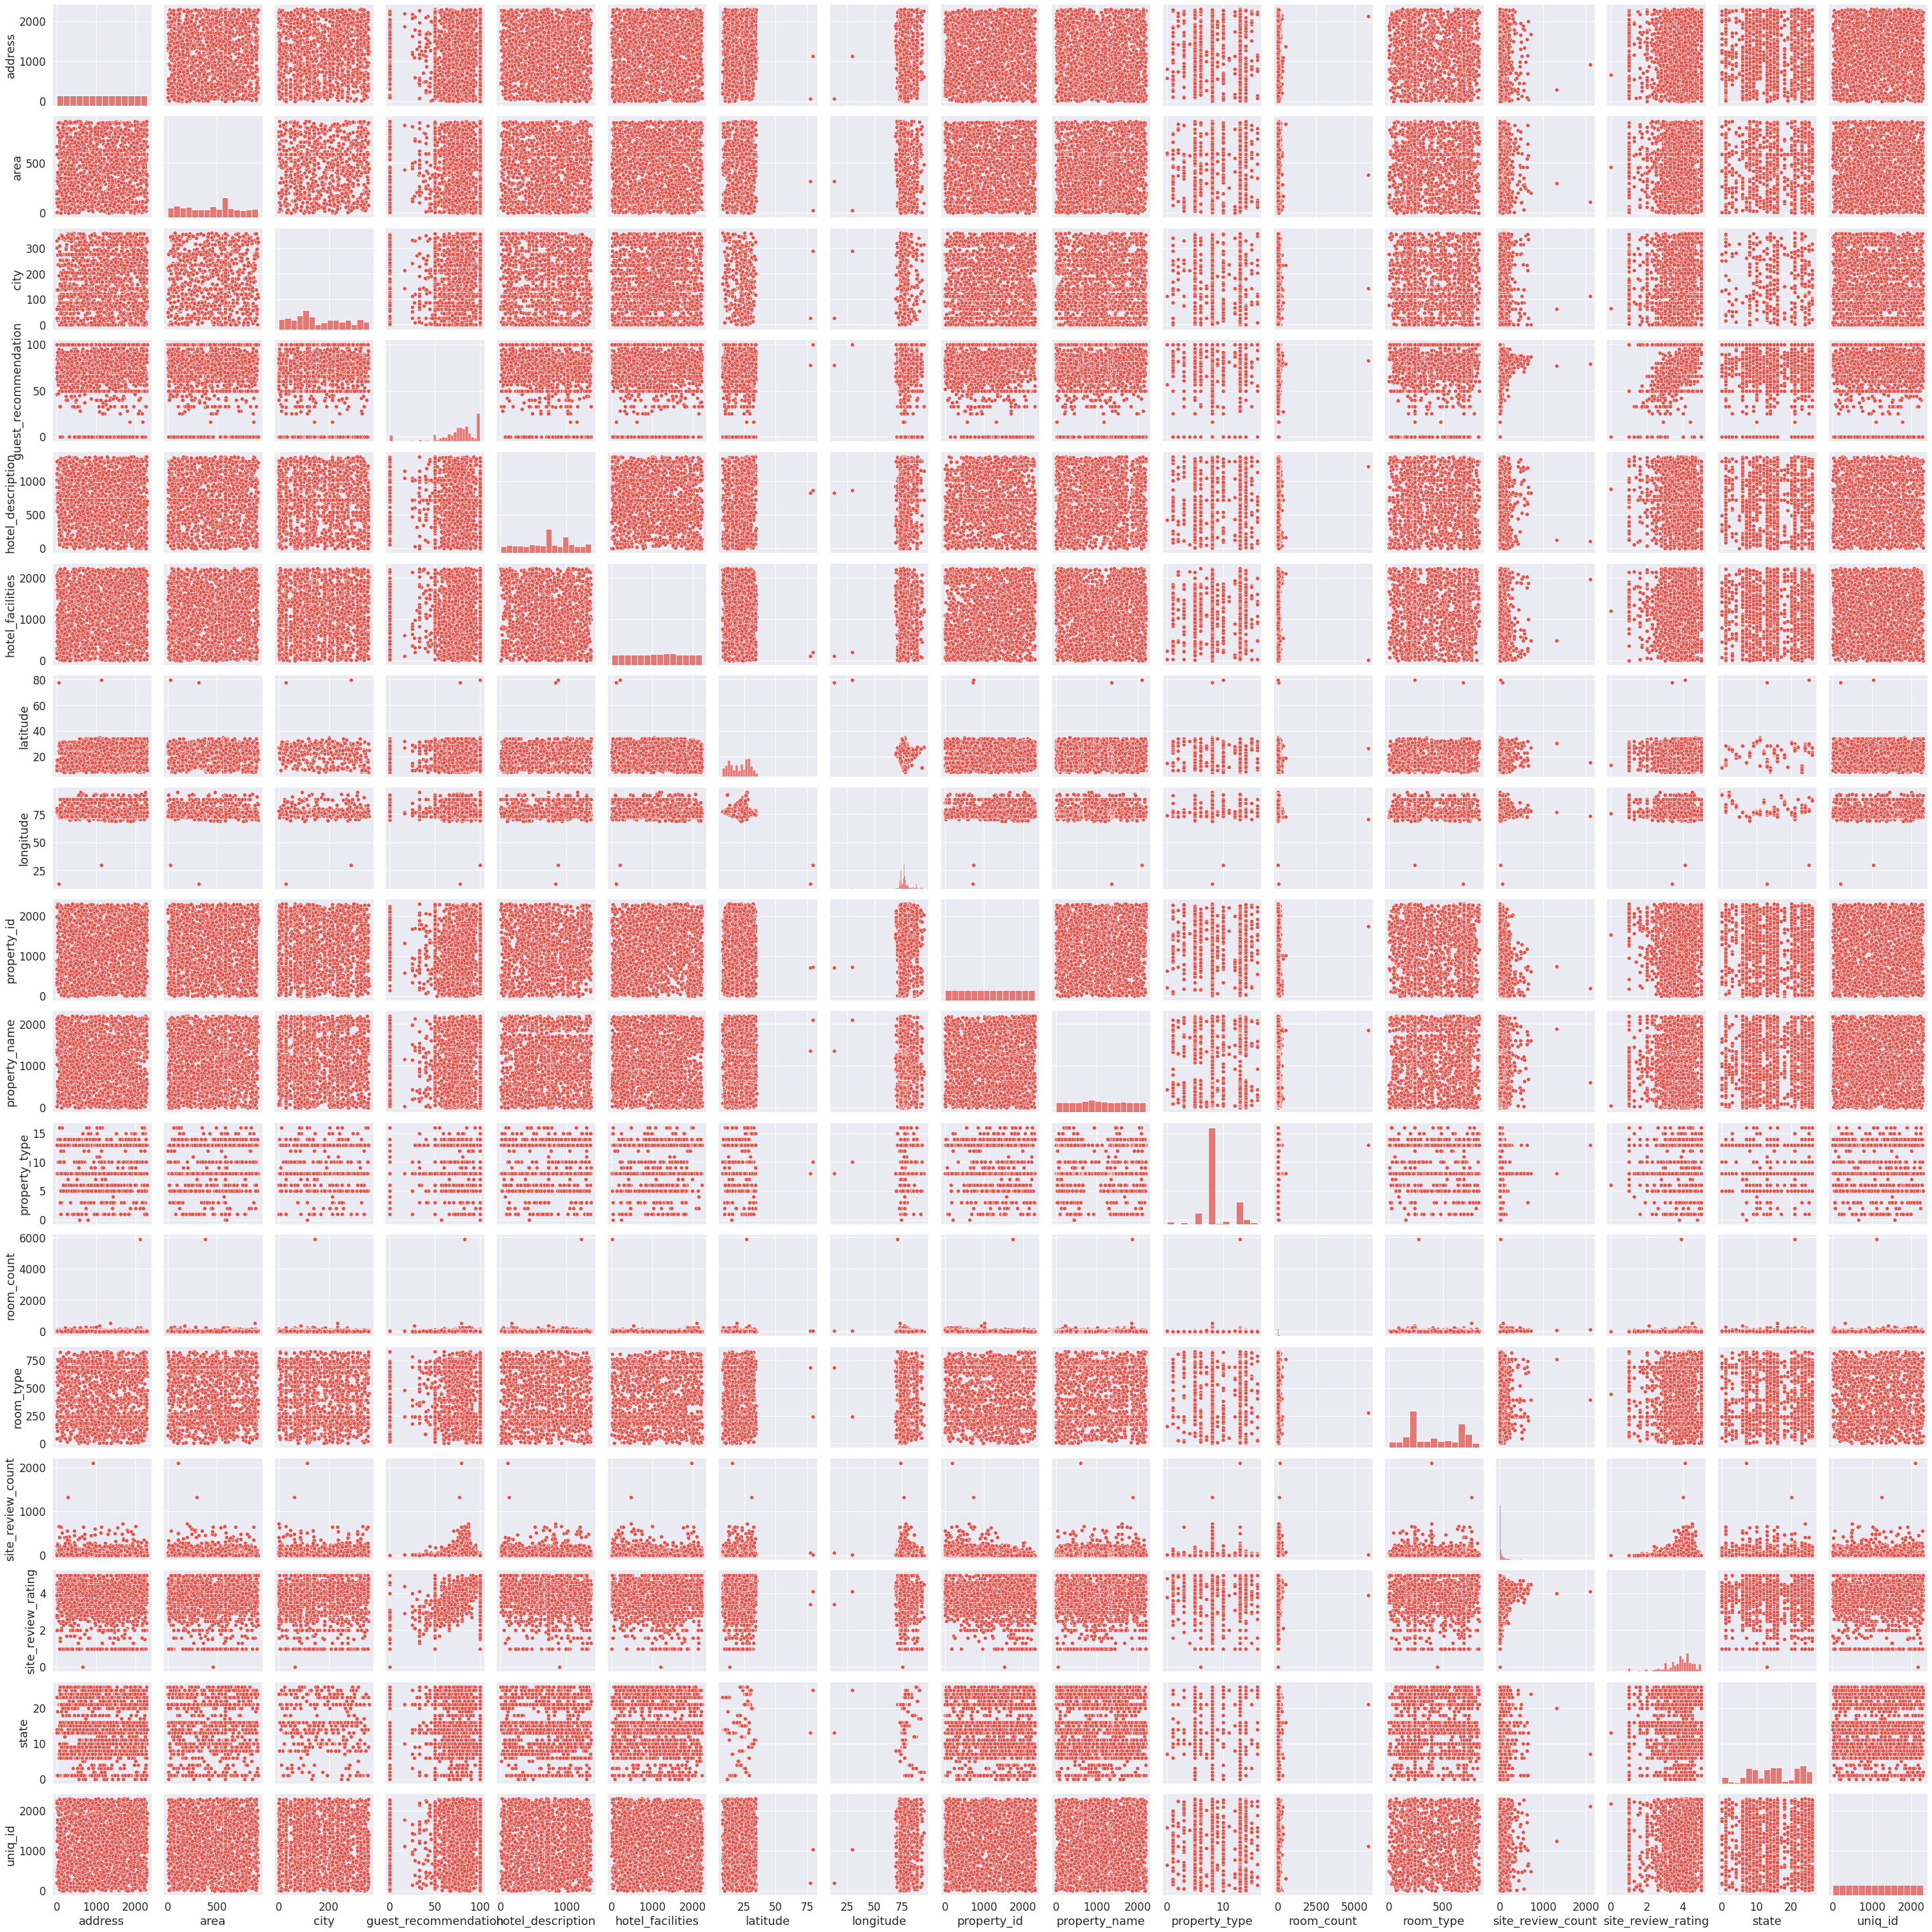

In [18]:
sns.pairplot(
    dff
)  # All attributes are plotted against each other to see the pattern of distribution

# Interpreting PairPlot
A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables

Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.

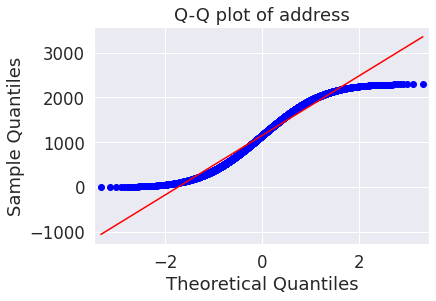

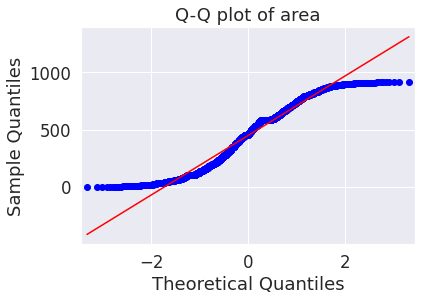

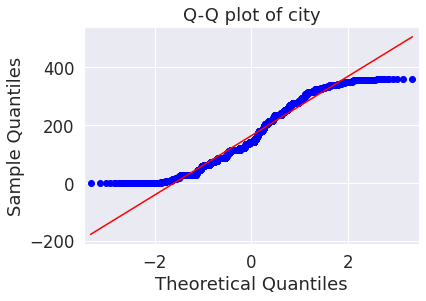

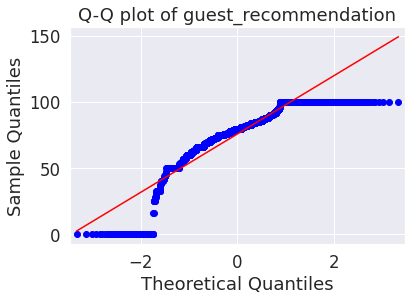

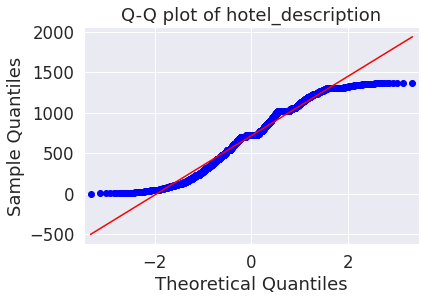

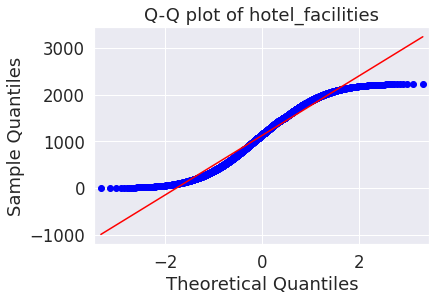

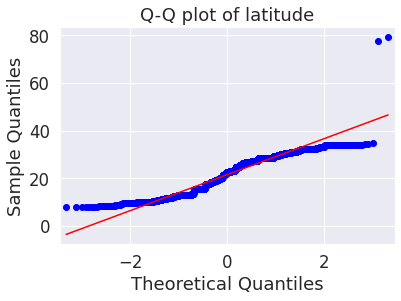

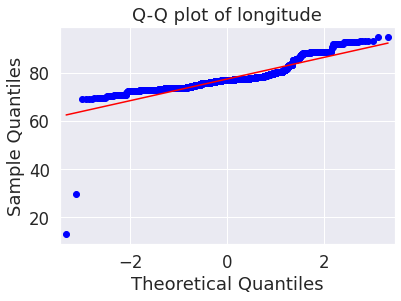

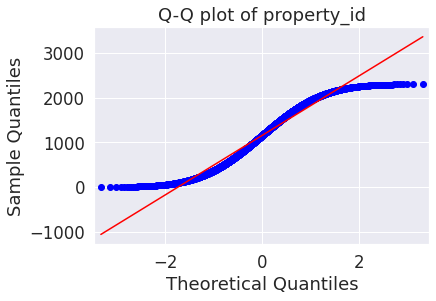

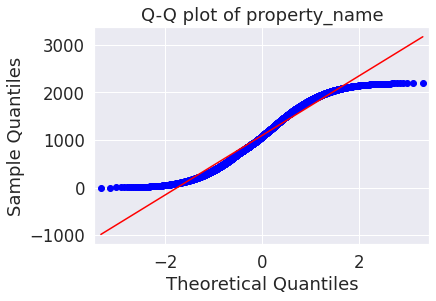

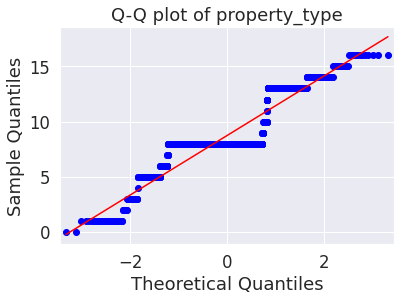

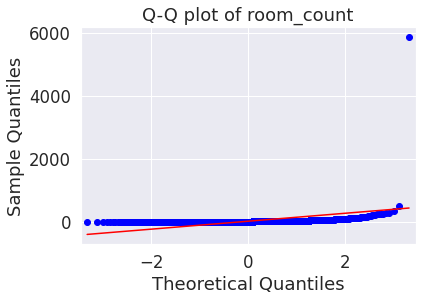

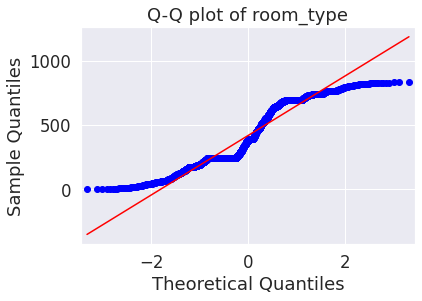

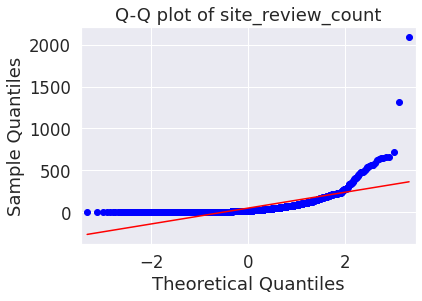

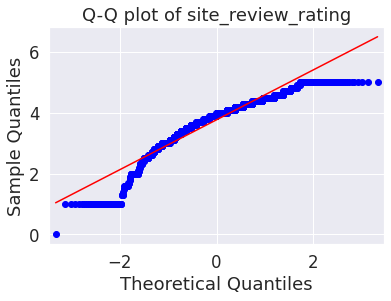

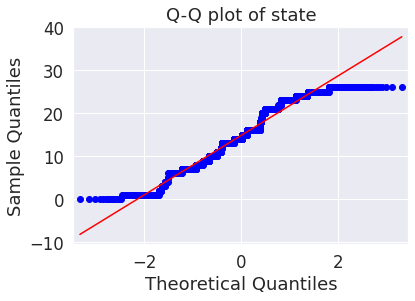

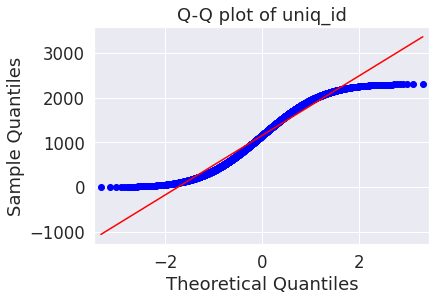

In [19]:
import statsmodels.api as sm
for col in dff.columns:
    sm.qqplot(dff[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

1 – Area: The distribution of area in goibibo appears to be approximately normally distributed

2 - City: The distribution of city in goibibo appears to be approximately normally distributed

3 – Guest recommendation: The distribution of Guest recommendation in goibibo appears to be skewed to the right

4 -Latitude: The distribution of Latitude in goibibo is positively skewed

5 – Property ID: The distribution of Property ID in gibibo appears to be skewed to the right

6 – Property Name: The distribution of Property Name in gibibo appears to be 
positively skewed

7 – Property type: The distribution of total sulfur dioxide in red wines appears to be positively skewed

8 – Room count : The distribution of Room count in goibibo is exponential distributed

9 – Room Type: The distribution of pH in red wines is normally distributed

10 – Site_review_count: The distribution of Room count in goibibo is exponential distributed

11 – Site_review_rating: The distribution of chlorides in red wines appears to be skewed to the right

12 – State: The distribution of State in goibibo appears to be approximately normally distributed

13 – uniq_id: The distribution of uniq_id in goibibo appears to be approximately normally distributed

14 – Address: The distribution of address in goibibo appears to be approximately normally distributed

15 – Hotel description: The distribution of Hotel description in goibibo appears to be approximately skewed to the right

16 – Hotel facilities: The distribution of Hotel facilities in goibibo appears to be approximately normally distributed


In [20]:
df = h2o.H2OFrame(
    dff
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
df.types  

{'address': 'int',
 'area': 'int',
 'city': 'int',
 'guest_recommendation': 'int',
 'hotel_description': 'int',
 'hotel_facilities': 'int',
 'latitude': 'real',
 'longitude': 'real',
 'property_id': 'int',
 'property_name': 'int',
 'property_type': 'int',
 'room_count': 'int',
 'room_type': 'int',
 'site_review_count': 'int',
 'site_review_rating': 'real',
 'state': 'int',
 'uniq_id': 'int'}

In [22]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [23]:
print(df_train.shape)
print(df_test.shape)

(1832, 17)
(470, 17)


In [24]:
df_train.head()

address    area    city    guest_recommendation    hotel_description    hotel_facilities    latitude    longitude    property_id    property_name    property_type    room_count    room_type    site_review_count    site_review_rating    state    uniq_id
---------  ------  ------  ----------------------  -------------------  ------------------  ----------  -----------  -------------  ---------------  ---------------  ------------  -----------  -------------------  --------------------  -------  ---------
      164     585     214                      85                  723                1132     32.1394      77.1547           1278               43               13            17          241                   87                   4         10        396
      830     108     113                      50                  510                2146     15.5484      73.7576            480               50               13            15          695                    2                   2.5        7       1385
     2017     877     214                     100                  723                1152     32.2236      77.1859            789               13                3            24          241                    1                   5         10       2013
      609     685     122                      90                 1315                 879     26.1662      91.7774           2157               22                8             4          192                   21                   4.3        2        135
     1827     818      63                      67                 1100                1598     12.8945      80.2274           1292                1                8            22          241                   28                   3.6       23        960
      809      62      68                       0                  759                 652     24.2678      72.4835           1990               42               12            21          590                    1                   1          8         59
     1351     814      77                      84                   63                1314     32.5374      75.9825           2135                3                8            10          172                   57                   4.2       10         78
     1876     660     244                      87                 1349                 898     19.1383      77.321            1996                4                8            10          495                   41                   3.2       16        599
     2010     873     214                     100                 1299                1377     32.2128      77.1984           2261               46                8            11          241                    1                   4         10        718
     1912     337     277                      97                  761                 254     18.5479      73.901             645                0               14            19            6                   41                   4.6       16        834
[10 rows x 17 columns]

In [25]:
print(df_train.shape)
print(df_test.shape)

(1832, 17)
(470, 17)


In [26]:
df_train.head()

address    area    city    guest_recommendation    hotel_description    hotel_facilities    latitude    longitude    property_id    property_name    property_type    room_count    room_type    site_review_count    site_review_rating    state    uniq_id
---------  ------  ------  ----------------------  -------------------  ------------------  ----------  -----------  -------------  ---------------  ---------------  ------------  -----------  -------------------  --------------------  -------  ---------
      164     585     214                      85                  723                1132     32.1394      77.1547           1278               43               13            17          241                   87                   4         10        396
      830     108     113                      50                  510                2146     15.5484      73.7576            480               50               13            15          695                    2                   2.5        7       1385
     2017     877     214                     100                  723                1152     32.2236      77.1859            789               13                3            24          241                    1                   5         10       2013
      609     685     122                      90                 1315                 879     26.1662      91.7774           2157               22                8             4          192                   21                   4.3        2        135
     1827     818      63                      67                 1100                1598     12.8945      80.2274           1292                1                8            22          241                   28                   3.6       23        960
      809      62      68                       0                  759                 652     24.2678      72.4835           1990               42               12            21          590                    1                   1          8         59
     1351     814      77                      84                   63                1314     32.5374      75.9825           2135                3                8            10          172                   57                   4.2       10         78
     1876     660     244                      87                 1349                 898     19.1383      77.321            1996                4                8            10          495                   41                   3.2       16        599
     2010     873     214                     100                 1299                1377     32.2128      77.1984           2261               46                8            11          241                    1                   4         10        718
     1912     337     277                      97                  761                 254     18.5479      73.901             645                0               14            19            6                   41                   4.6       16        834
[10 rows x 17 columns]

In [27]:
X = df.columns
print(X)

['address', 'area', 'city', 'guest_recommendation', 'hotel_description', 'hotel_facilities', 'latitude', 'longitude', 'property_id', 'property_name', 'property_type', 'room_count', 'room_type', 'site_review_count', 'site_review_rating', 'state', 'uniq_id']


In [28]:
# Set target and predictor variables
y = "site_review_rating"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['address', 'area', 'city', 'guest_recommendation', 'hotel_description', 'hotel_facilities', 'latitude', 'longitude', 'property_id', 'property_name', 'property_type', 'room_count', 'room_type', 'site_review_count', 'state', 'uniq_id']


In [29]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [30]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_43108


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.22857762982370736
RMSE: 0.47809792911464
MAE: 0.3349357349320415
RMSLE: 0.1238832546698584
Mean Residual Deviance: 0.22857762982370736
R^2: 0.6723699406105234
Null degrees of freedom: 1831
Residual degrees of freedom: 1828
Null deviance: 1278.1312515012999
Residual deviance: 418.7542178370319
AIC: 2505.1797437335676

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.41945322972092136
RMSE: 0.6476520900305359
MAE: 0.4480261119774329
RMSLE: 0.16367764590994424
Mean Residual Deviance: 0.41945322972092136
R^2: 0.3987798076714497
Null degrees of freedom: 1831
Residual degrees of freedom: 1827
Null deviance: 1278.610492785485
Residual deviance: 768.4383168487279
AIC: 3619.343231983319

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.448077  0.00932279  0.449592      0.438835      0.439975      0.461866      0.450116
mean_residual_deviance  0.419598  0.0257247   0.411608      0.414292      0.403983      0.464821      0.403285
mse                     0.419598  0.0257247   0.411608      0.414292      0.403983      0.464821      0.403285
null_deviance           255.722   25.3674     276.618       217.114       262.625       277.569       244.684
r2                      0.39485   0.0531776   0.447154      0.307232      0.423614      0.393121      0.40313
residual_deviance       153.688   8.52012     152.707       150.388       151.09        168.265       145.989
rmse                    0.647529  0.0195045   0.641567      0.643655      0.635596      0.681778      0.635047
rmsle                   0.163584  0.00603924  0.170484      0.162898      0.159092      0.168895      0.156554

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Understanding the Parameters
Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.



In [31]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_43108  0.647652  0.419453  0.448026  0.163678                  0.419453
StackedEnsemble_AllModels_3_AutoML_1_20230301_43108     0.647769  0.419605  0.447653  0.163561                  0.419605
GBM_grid_1_AutoML_1_20230301_43108_model_9              0.653338  0.426851  0.456343  0.165767                  0.426851
StackedEnsemble_AllModels_1_AutoML_1_20230301_43108     0.653379  0.426904  0.450159  0.166262                  0.426904
XGBoost_grid_1_AutoML_1_20230301_43108_model_19         0.654102  0.42785   0.453568  0.164357                  0.42785
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_43108  0.654383  0.428217  0.451411  0.166663                  0.428217
StackedEnsemble_AllModels_2_AutoML_1_20230301_43108     0.654817  0.428785  0.451679  0.166585                  0.428785
XGBoost_grid_1_AutoML_1_20230301_

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is
StackedEnsemble_BestOfFamily_5_AutoML_1_20230228_183212 with rmse score of 0.63508 

The models are then listed in descending order based on their rmse scores.

In [32]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_43108': 0,
 'StackedEnsemble_AllModels_3_AutoML_1_20230301_43108': 1,
 'GBM_grid_1_AutoML_1_20230301_43108_model_9': 2,
 'GLM_1_AutoML_1_20230301_43108': 58}

In [33]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [34]:
best_model.algo

'gbm'

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

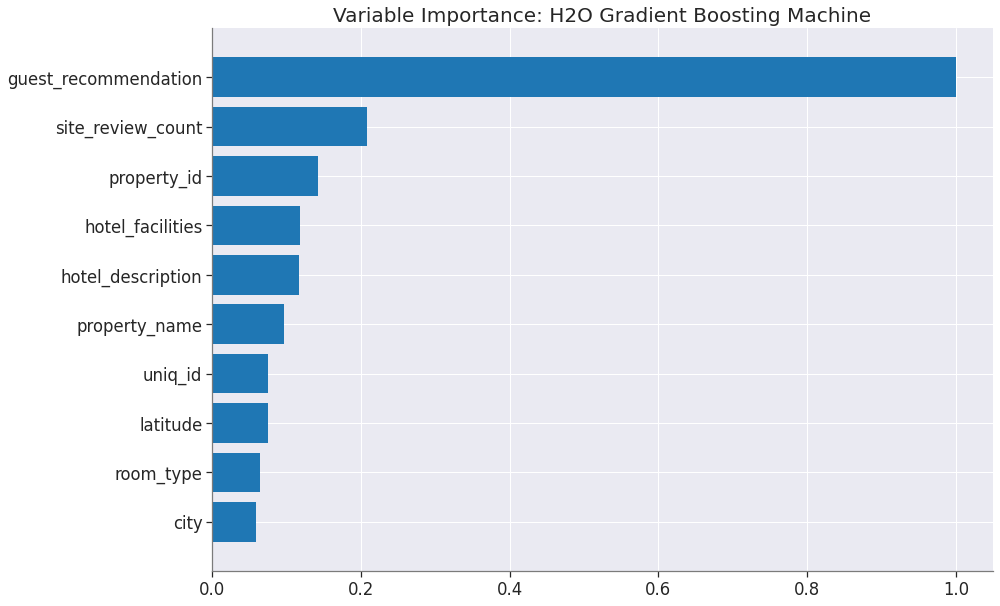

<Figure size 432x288 with 0 Axes>

In [36]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model

We can Interpret that guest_recommendation is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)


58
glm


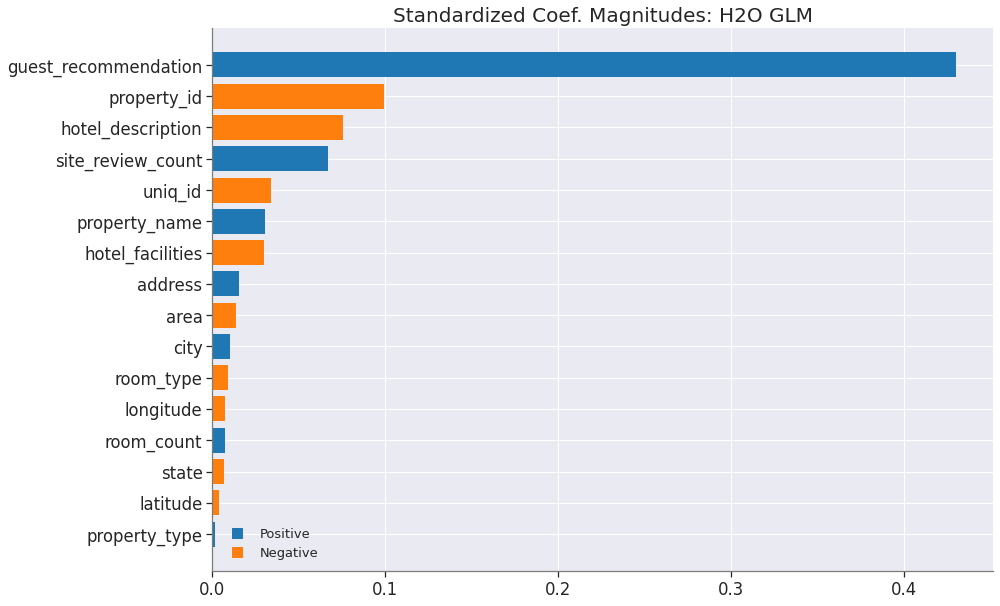

In [37]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

From the above results, we observe that guest_recommendation, site_review_count, property_name are some of the important features.


In [38]:
print(best_model.rmse(train=True))

0.5035658105390652


In [39]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [40]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.37470946436388225,
 'rmse': 0.6121351683769544,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [41]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [42]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    4.188603
1    3.398332
2    3.582616
3    4.016701
4    1.699782
..        ...
465  3.766172
466  4.023454
467  3.853391
468  3.621065
469  2.953452

[470 rows x 1 columns]


In [43]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

site_review_rating
0                   4.5
1                   2.8
2                   3.9
3                   4.0
4                   3.0
..                  ...
465                 3.9
466                 4.2
467                 3.6
468                 3.4
469                 4.3

[470 rows x 1 columns]

In [44]:
print(X)


['address', 'area', 'city', 'guest_recommendation', 'hotel_description', 'hotel_facilities', 'latitude', 'longitude', 'property_id', 'property_name', 'property_type', 'room_count', 'room_type', 'site_review_count', 'state', 'uniq_id']


# Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [45]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

hotel_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
hotel_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
hotel_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
hotel_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.
 
The first instance of the H2OGeneralizedLinearEstimator class is created with the family parameter set to "gaussian", which means that the response variable is assumed to have a normal (Gaussian) distribution. The lambda_ parameter is set to 0, which means that no regularization is applied. The compute_p_values parameter is set to True, which means that p-values will be computed for the coefficients of the GLM model. The nfolds parameter is set to 5, which means that the data will be split into 5 folds for cross-validation.

The next three instances of the H2OGeneralizedLinearEstimator class are created with different settings for regularization. The second instance uses ridge regularization (alpha=0), the third instance uses lasso regularization (alpha=1), and the fourth instance uses lambda search to find the optimal value of lambda for elastic net regularization.

This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.



In [46]:
hotel_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644956947_25


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              16                            16                             1                       py_2_sid_a9bd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.46219116108990005
RMSE: 0.6798464246356672
MAE: 0.4781279341947284
RMSLE: 0.17311613341086404
Mean Residual Deviance: 0.46219116108990005
R^2: 0.337521709040534
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1278.1312515012999
Residual deviance: 846.7342071166969
AIC: 3821.095862310477

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4859226510498582
RMSE: 0.6970815239624834
MAE: 0.4853597335824917
RMSLE: 0.1752964909298886
Mean Residual Deviance: 0.4859226510498582
R^2: 0.30350635298392625
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1278.4020477418524
Residual deviance: 890.2102967233402
AIC: 3912.825719819442

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.485911  0.0306451  0.527003      0.456411      0.454327      0.496259      0.495554
mean_residual_deviance  0.486842  0.0959438  0.60017       0.421683      0.368721      0.562639      0.480998
mse                     0.486842  0.0959438  0.60017       0.421683      0.368721      0.562639      0.480998
null_deviance           255.68    19.5824    258.19        236.482       237.681       283.827       262.223
r2                      0.306654  0.0965745  0.174786      0.341237      0.4102        0.240356      0.366689
residual_deviance       178.042   34.3409    213.06        155.601       140.114       215.491       165.944
rmse                    0.694987  0.0692406  0.774706      0.649371      0.607224      0.750093      0.69354
rmsle                   0.174707  0.0202841  0.19988       0.162598      0.147236      0.183787      0.180032

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  -----------------
    2023-03-01 04:34:56  0.000 sec   0             1278.1312445414871         0.697669893308672
    2023-03-01 04:34:56  0.026 sec   1                                                           0.6798464246356672  0.46219116108990005  0.4781279341947284  0.337521709040534

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
guest_recommendation  0.445614               1                    0.512518
property_id           0.103905               0.233174             0.119506
hotel_description     0.0775201              0.173963             0.0891589
site_review_count     0.0671862              0.150772             0.0772735
uniq_id               0.0350728              0.0787068            0.0403386
property_name         0.03183                0.0714296            0.036609
hotel_facilities      0.0309361              0.0694236            0.0355808
address               0.0168472              0.0378068            0.0193767
area                  0.0151427              0.0339817            0.01

# Ridge Regularization

In [47]:
hotel_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644956947_26


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 4.53E-4 )  16                            16                             1                       py_2_sid_a9bd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.46219120669894354
RMSE: 0.6798464581793036
MAE: 0.4781511127725051
RMSLE: 0.173121669409293
Mean Residual Deviance: 0.46219120669894354
R^2: 0.337521643667148
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1278.1312515012999
Residual deviance: 846.7342906724646
AIC: 3821.0960430923055

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4807675751964238
RMSE: 0.6933740514299794
MAE: 0.4859670627564185
RMSLE: 0.17510061416809425
Mean Residual Deviance: 0.4807675751964238
R^2: 0.3108953429271726
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1279.1743776709545
Residual deviance: 880.7661977598484
AIC: 3893.286495708912

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.485548  0.0357432  0.439421      0.510546      0.506711      0.516432      0.454629
mean_residual_deviance  0.479677  0.0908715  0.363236      0.518299      0.57036       0.542793      0.403695
mse                     0.479677  0.0908715  0.363236      0.518299      0.57036       0.542793      0.403695
null_deviance           255.835   51.8653    207.652       296.041       315.235       261.519       198.728
r2                      0.310034  0.0363896  0.365563      0.311569      0.317087      0.285258      0.270697
residual_deviance       176.153   36.9101    130.402       203.692       215.026       186.721       144.926
rmse                    0.689991  0.0669741  0.602691      0.71993       0.755222      0.736745      0.63537
rmsle                   0.173358  0.0234897  0.145095      0.18429       0.204213      0.177671      0.155522

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  -----------------
    2023-03-01 04:34:56  0.000 sec   0             1278.1312445414871         0.697669893308672
    2023-03-01 04:34:56  0.007 sec   1                                                           0.6798464581793036  0.46219120669894354  0.4781511127725051  0.337521643667148

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
guest_recommendation  0.445409               1                    0.512472
property_id           0.103848               0.233152             0.119484
hotel_description     0.0774959              0.173988             0.0891642
site_review_count     0.0671883              0.150846             0.0773046
uniq_id               0.0350576              0.0787088            0.0403361
property_name         0.0318177              0.071435             0.0366084
hotel_facilities      0.0309271              0.0694354            0.0355837
address               0.0168312              0.0377881            0.0193654
area                  0.0151292         

Looking at the performance metrics reported on the training data, we can see that the two models have almost identical values for all the metrics. However, when we look at the metrics reported on the cross-validation data, we see that the Ridge-regularized model outperforms the non-regularized model. Specifically, the Ridge-regularized model has a slightly lower MSE, RMSE, and RMSLE, and a slightly higher R-squared value. This suggests that Ridge regularization was successful in improving the model's ability to generalize to data.

Overall, the analysis shows that adding Ridge regularization to the model improved its performance on data.

# Lasso Regularization

In [48]:
hotel_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644956947_27


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 4.53E-4 )  16                            16                             1                       py_2_sid_a9bd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4621941146075594
RMSE: 0.6798485968269401
MAE: 0.47807044371072493
RMSLE: 0.17314288521135507
Mean Residual Deviance: 0.4621941146075594
R^2: 0.33751747563778633
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1278.1312515012999
Residual deviance: 846.7396179610488
AIC: 3821.107569213419

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4800158506653502
RMSE: 0.6928317621654987
MAE: 0.48540192183826814
RMSLE: 0.17498186406676047
Mean Residual Deviance: 0.4800158506653502
R^2: 0.31197282173798446
Null degrees of freedom: 1831
Residual degrees of freedom: 1815
Null deviance: 1280.0622602999188
Residual deviance: 879.3890384189216
AIC: 3890.4197526222347

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.48575   0.0249911  0.442775      0.487902      0.500282      0.505601      0.49219
mean_residual_deviance  0.481006  0.0408316  0.410077      0.500415      0.4824        0.504838      0.507298
mse                     0.481006  0.0408316  0.410077      0.500415      0.4824        0.504838      0.507298
null_deviance           256.012   17.8041    255.937       247.606       267.467       231.486       277.566
r2                      0.309286  0.0505735  0.386906      0.298574      0.275336      0.258199      0.327413
residual_deviance       175.878   14.3008    155.419       173.644       191.995       171.645       186.686
rmse                    0.693018  0.0302362  0.640372      0.7074        0.69455       0.71052       0.712249
rmsle                   0.175026  0.0107703  0.159939      0.180261      0.168631      0.178903      0.187397

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -------------------  -------------------
    2023-03-01 04:34:56  0.000 sec   0             1278.1312445414871         0.697669893308672
    2023-03-01 04:34:56  0.004 sec   1                                                           0.6798485968269401  0.4621941146075594   0.47807044371072493  0.33751747563778633

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
guest_recommendation  0.445238               1                    0.515926
property_id           0.103639               0.232771             0.120093
hotel_description     0.0771472              0.173272             0.0893954
site_review_count     0.0669718              0.150418             0.0776045
uniq_id               0.0345603              0.077622             0.0400472
property_name         0.0313556              0.0704243            0.0363337
hotel_facilities      0.0303574              0.0681825            0.0351771
address               0.0163652              0.0367561            0.0189634
area                  0.0146444

# Which Regularization Method Helps ?

The R-squared (R²) values for all three models are similar, indicating that they all explain a similar amount of variance in the target variable.

However, the MSE, RMSE, and MAE values are slightly lower for the ridge regression model than the other two models. 

Additionally, the ridge regression model has the lowest AIC score. 

The lasso regression model has the highest RMSLE value, indicating that it may not perform well when predicting values that are significantly different from the average.

Overall, the ridge regression model appears to be the best performing model based on the evaluation metrics used.





In [49]:
lambda_search = hotel_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [50]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677644956947_28


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.005431 )  nlambda = 100, lambda.max = 0.906, lambda.min = 0.005431, lambda.1se = -1.0  16                            15                             56                      py_2_sid_a9bd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.46230355920458976
RMSE: 0.6799290839525765
MAE: 0.4779646651476793
RMSLE: 0.17332815511055885
Mean Residual Deviance: 0.46230355920458976
R^2: 0.33736060403205415
Null degrees of freedom: 1831
Residual degrees of freedom: 1816
Null deviance: 1278.1312515012999
Residual deviance: 846.9401204628084
AIC: 3819.5413236908516

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  ------------------  -------------------
     2023-03-01 04:34:56  0.000 sec   1            .91E0     1             0.6976698933086148   0.5
     2023-03-01 04:34:56  0.003 sec   2            .83E0     2             0.6726630136459555   0.5
     2023-03-01 04:34:56  0.004 sec   3            .75E0     2             0.6501358219588182   0.5
     2023-03-01 04:34:56  0.005 sec   4            .69E0     2             0.6299489816088982   0.5
     2023-03-01 04:34:56  0.005 sec   5            .62E0     2             0.6119504327535973   0.5
     2023-03-01 04:34:56  0.006 sec   6            .57E0     2             0.5959801807022405   0.5
     2023-03-01 04:34:56  0.006 sec   7            .52E0     2             0.5818746126920104   0.5
     2023-03-01 04:34:56  0.007 sec   8            .47E0     2             0.5694702514146285   0.5
     2023-03-01 04:34:56  0.011 sec   9            .43E0     2             0.5586068980149332   0.5
     2023-03-01 04:34:56  0.011 sec   10           .39E0     2             0.549130155811658    0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                 ---
     2023-03-01 04:34:56  0.045 sec   47           .13E-1    15            0.4627689111463264   0.5
     2023-03-01 04:34:56  0.045 sec   48           .11E-1    15            0.4626733163174429   0.5
     2023-03-01 04:34:56  0.047 sec   49           .1E-1     15            0.4625937141879554   0.5
     2023-03-01 04:34:56  0.049 sec   50           .95E-2    15            0.4625274461416817   0.5
     2023-03-01 04:34:56  0.050 sec   51           .86E-2    15            0.46247244891250827  0.5
     2023-03-01 04:34:56  0.051 sec   52           .79E-2    15            0.46242681546159853  0.5
     2023-03-01 04:34:56  0.051 sec   53           .72E-2    16            0.4623870323832891   0.5
     2023-03-01 04:34:56  0.058 sec   54           .65E-2    16            0.46235398195241195  0.5
     2023-03-01 04:34:56  0.059 sec   55           .6E-2     16            0.4623264663076134   0.5
     2023-03-01 04:34:56  0.059 sec   56           .54E-2    16            0.46230355649081245  0.5      56            0.6799290839525765  0.46230355920458976  0.4779646651476793  0.33736060403205415
[56 rows x 13 

In [51]:
coeff_table = hotel_glm._model_json["output"]["coefficients_table"]

In [52]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error    z_value        p_value  \
0              Intercept      2.721521   0.316699   8.593404   1.789508e-17   
1                address      0.000025   0.000025   1.026385   3.048468e-01   
2                   area     -0.000059   0.000063  -0.928760   3.531371e-01   
3                   city      0.000099   0.000159   0.623509   5.330286e-01   
4   guest_recommendation      0.020174   0.000732  27.564877  5.179257e-140   
5      hotel_description     -0.000212   0.000045  -4.711349   2.647955e-06   
6       hotel_facilities     -0.000049   0.000026  -1.843152   6.546977e-02   
7               latitude     -0.000440   0.002214  -0.198673   8.425411e-01   
8              longitude     -0.001563   0.003821  -0.409222   6.824250e-01   
9            property_id     -0.000156   0.000026  -6.127632   1.091283e-09   
10         property_name      0.000051   0.000026   1.979658   4.789280e-02   
11         property_type      0.000228   0.006371   0.035805   9.714418e-01   
12            room_count      0.000053   0.000115   0.465073   6.419353e-01   
13             room_type     -0.000044   0.000070  -0.632479   5.271538e-01   
14     site_review_count      0.000803   0.000200   4.007138   6.394283e-05   
15                 state     -0.001034   0.002383  -0.433965   6.643651e-01   
16               uniq_id     -0.000053   0.000024  -2.186868   2.887939e-02   

    standardized_coefficients  
0                    3.762555  
1                    0.016847  
2                   -0.015143  
3                    0.010108  
4                    0.445614  
5                   -0.077520  
6                   -0.030936  
7                   -0.003300  
8                   -0.006681  
9                   -0.103905  
10                   0.031830  
11                   0.000607  
12                   0.007463  
13                  -0.010144  
14                   0.067186  
15                  -0.007103  
16                  -0.035073

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_43108  0.596142  0.355385  0.413211  0.142509                  0.355385                 291                   0.015598  StackedEnsemble
GBM_1_AutoML_1_20230301_43108                           0.597748  0.357302  0.416702  0.143429                  0.357302                 630                   0.011411  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_16             0.599164  0.358998  0.419977  0.14339                   0.358998                 192                   0.014479  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_43108  0.600152  0.360183  0.416152  0.143943                  0.360183                 157                   0.041621  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_43108     0.600764  0.360917  0.416851  0.144648                  0.360917                 176                   0.03298   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_43108     0.601931  0.362321  0.417517  0.144873                  0.362321                 173                   0.032876  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_43108  0.601971  0.362369  0.415988  0.144555                  0.362369                 311                   0.041653  StackedEnsemble
GBM_grid_1_AutoML_1_20230301_43108_model_17             0.608219  0.36993   0.4233    0.148046                  0.36993                  139                   0.009033  GBM
GBM_2_AutoML_1_20230301_43108                           0.608258  0.369977  0.425604  0.148504                  0.369977                 268                   0.010238  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_2              0.608842  0.370688  0.424501  0.147957                  0.370688                 141                   0.007182  GBM
StackedEnsemble_AllModels_3_AutoML_1_20230301_43108     0.609311  0.37126   0.421598  0.147253                  0.37126                  549                   0.083559  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230301_43108_model_21         0.609415  0.371387  0.42434   0.146278                  0.371387                 129                   0.003935  XGBoost
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_43108  0.609487  0.371474  0.422697  0.147411                  0.371474                 171                   0.020174  StackedEnsemble
GBM_grid_1_AutoML_1_20230301_43108_model_14             0.609908  0.371987  0.427318  0.147421                  0.371987                 131                   0.016549  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_5              0.610942  0.37325   0.427261  0.148525                  0.37325                  343                   0.009904  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_9              0.612135  0.374709  0.42942   0.148415                  0.374709                 126                   0.010513  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_7              0.612718  0.375423  0.432902  0.147464                  0.375423                 165                   0.012188  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_11             0.616358  0.379897  0.4363    0.149157                  0.379897                 117                   0.014786  GBM
GBM_grid_1_AutoML_1_20230301_43108_model_12             0.617032  0.380728  0.428983  0.150331                  0.380728                 225                   0.007972  GBM
GBM_5_AutoML_1_20230301_43108                           0.617654  0.381496  0.434485  0.149482                  0.381496                 193                   0.009532  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

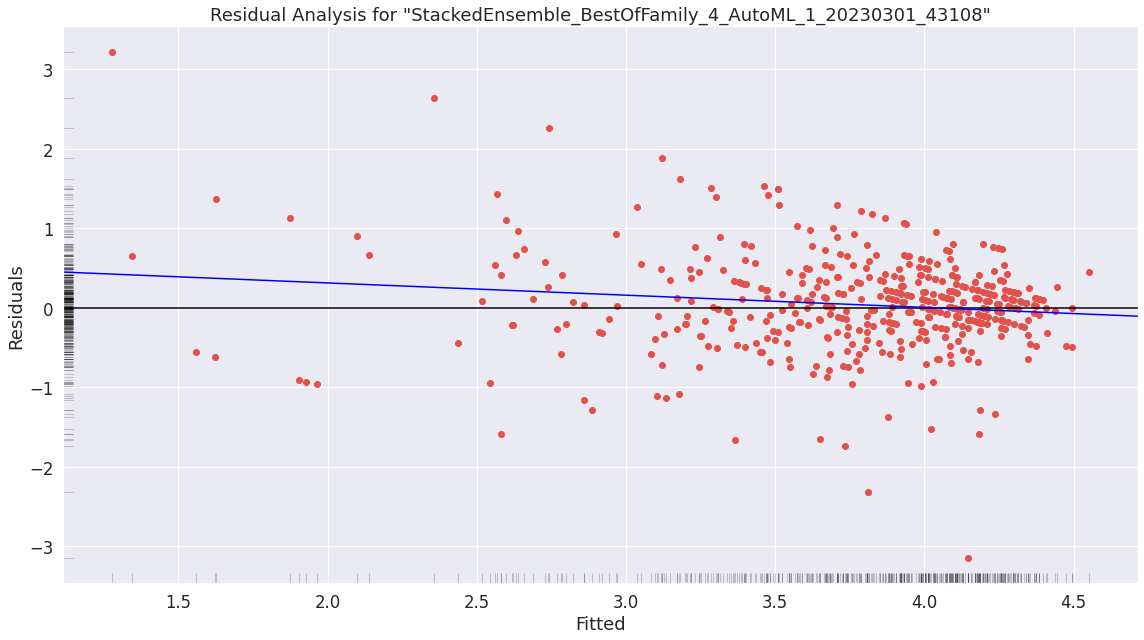

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

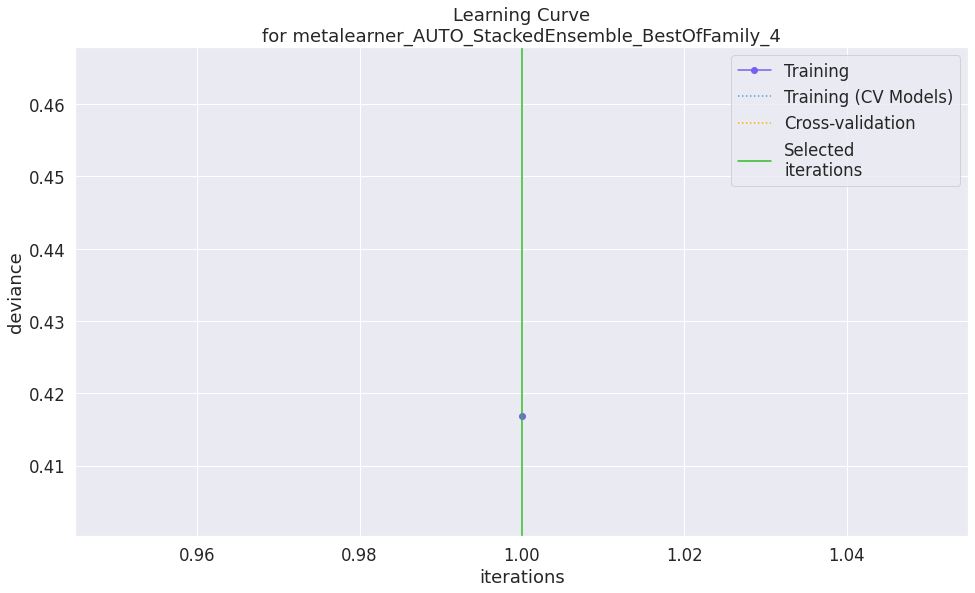

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

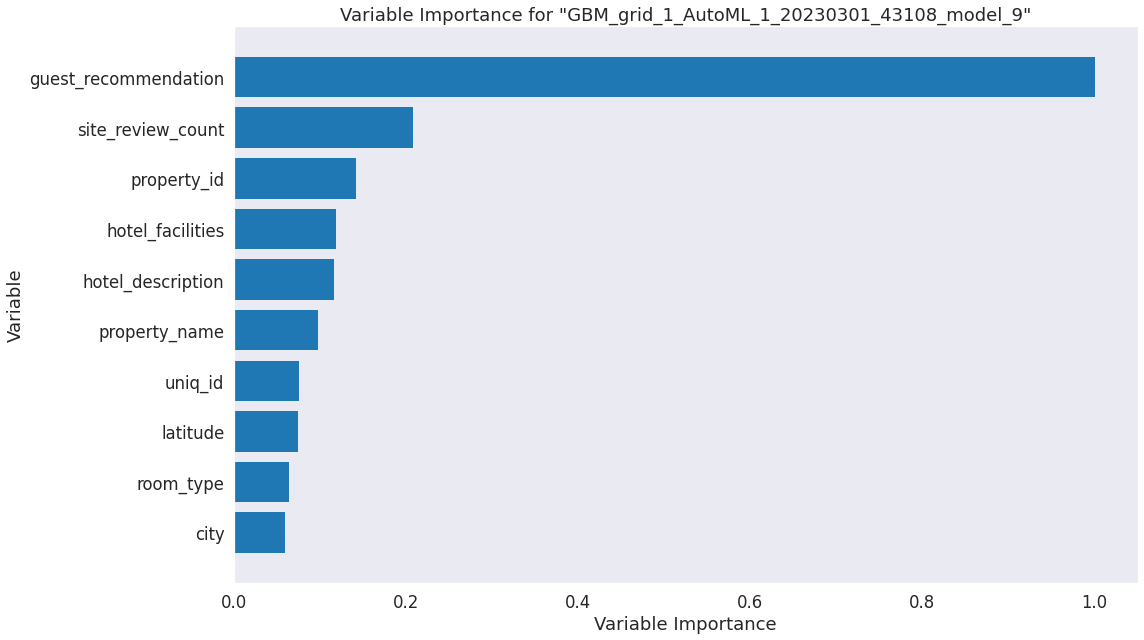

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

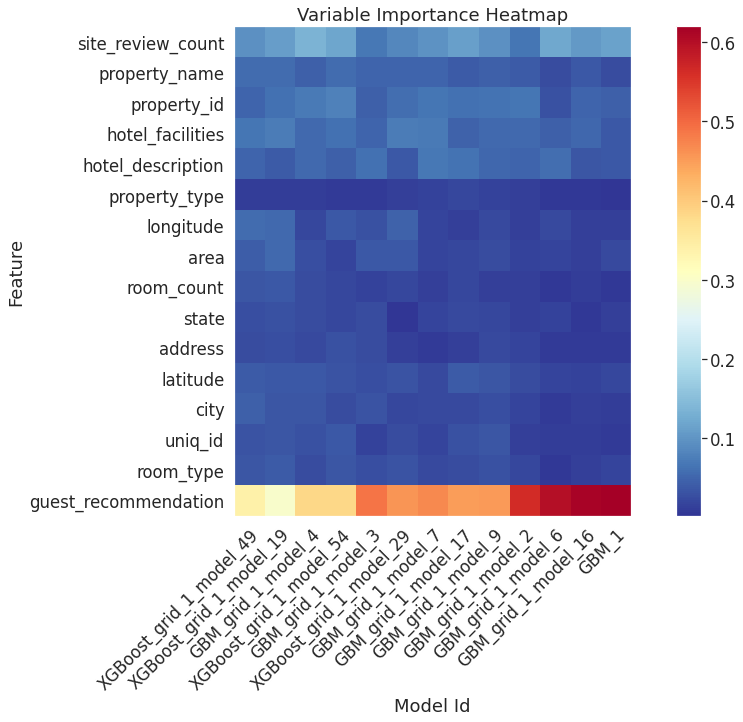

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

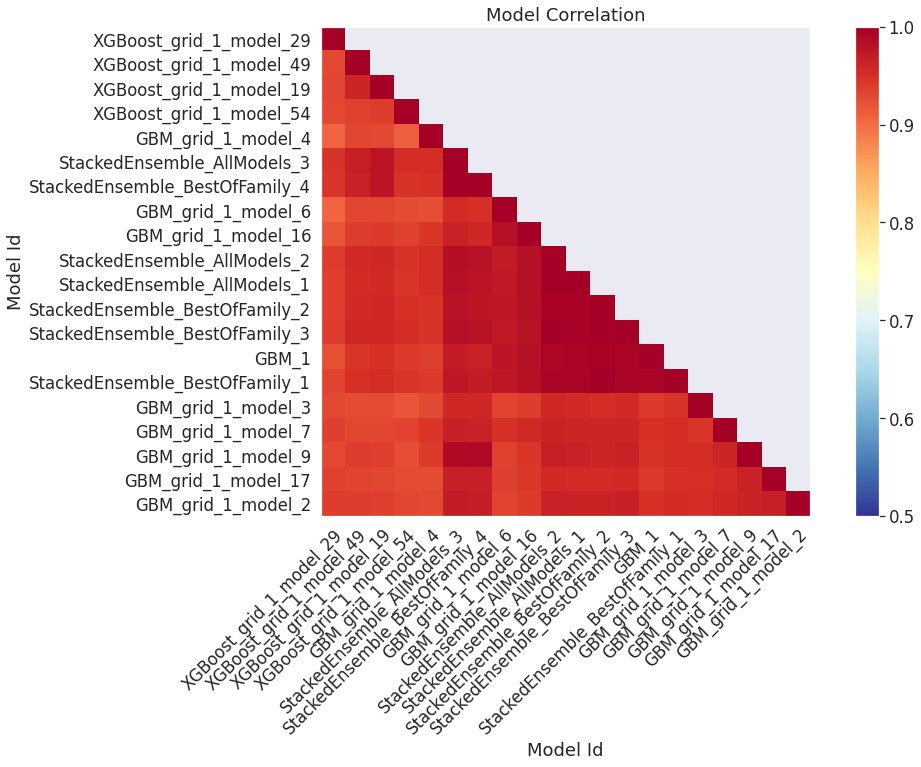

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

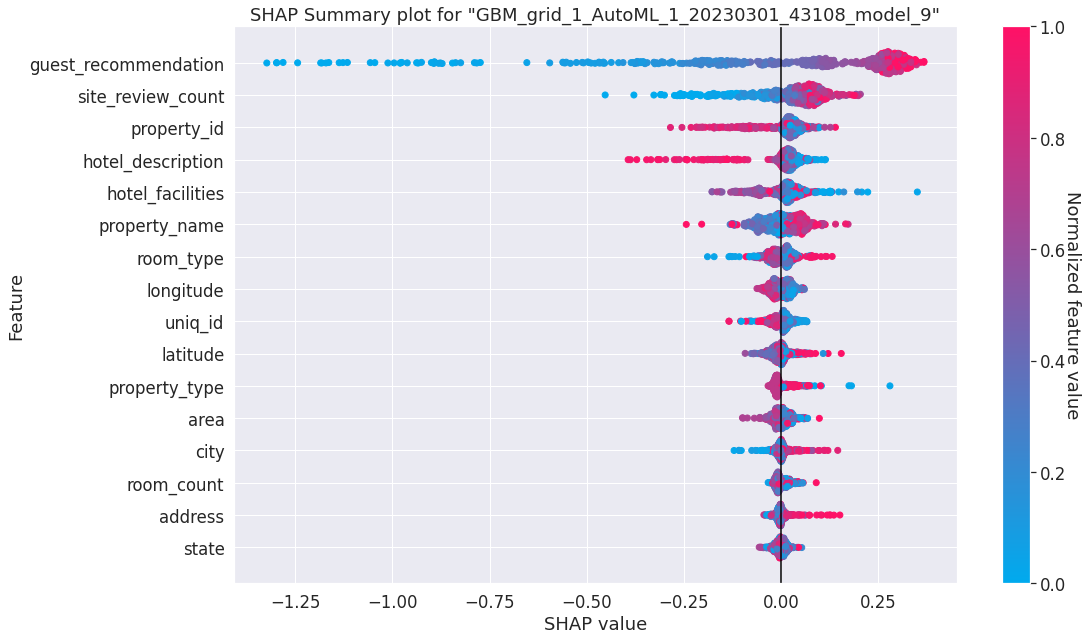

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

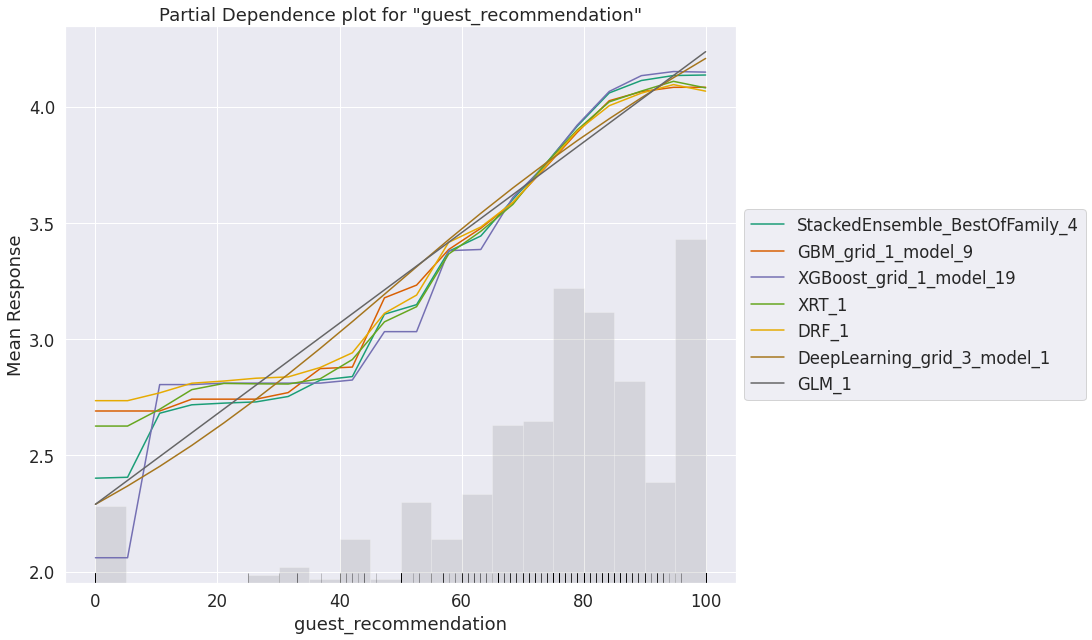

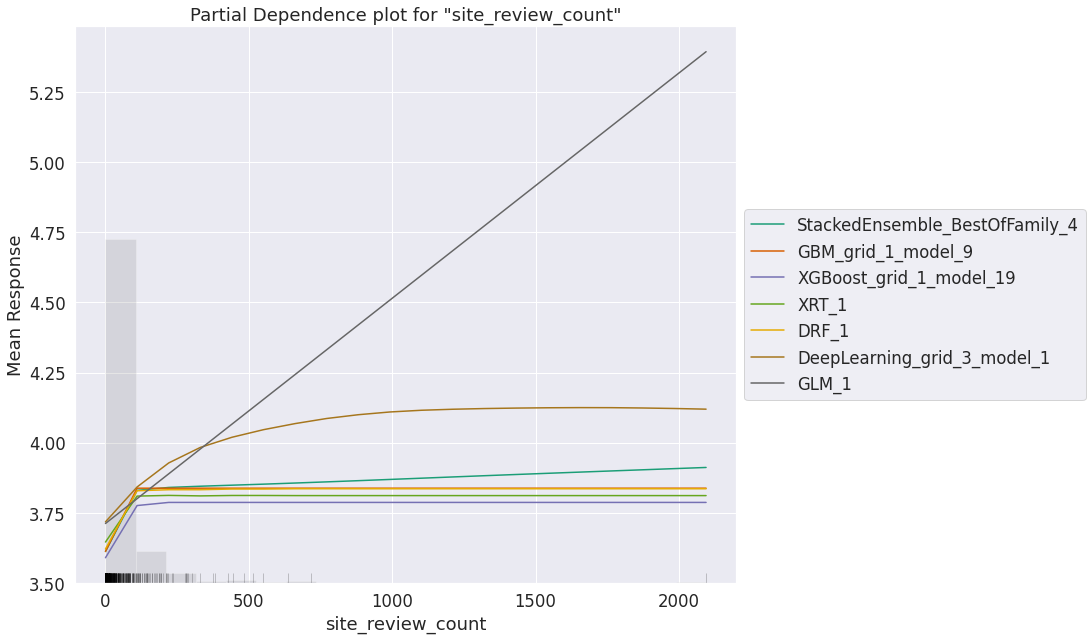

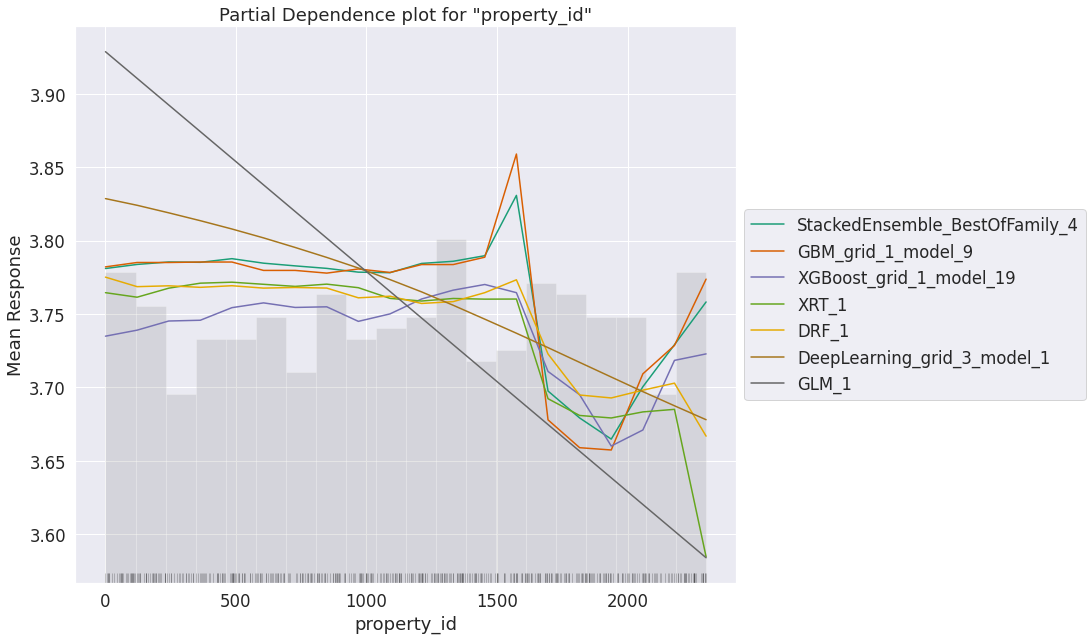

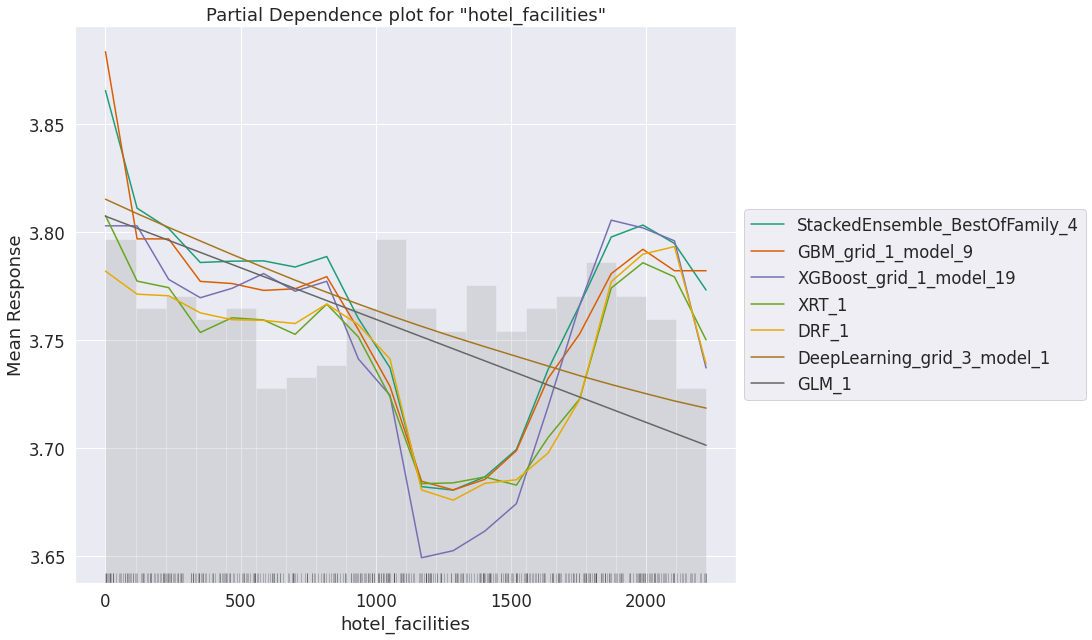

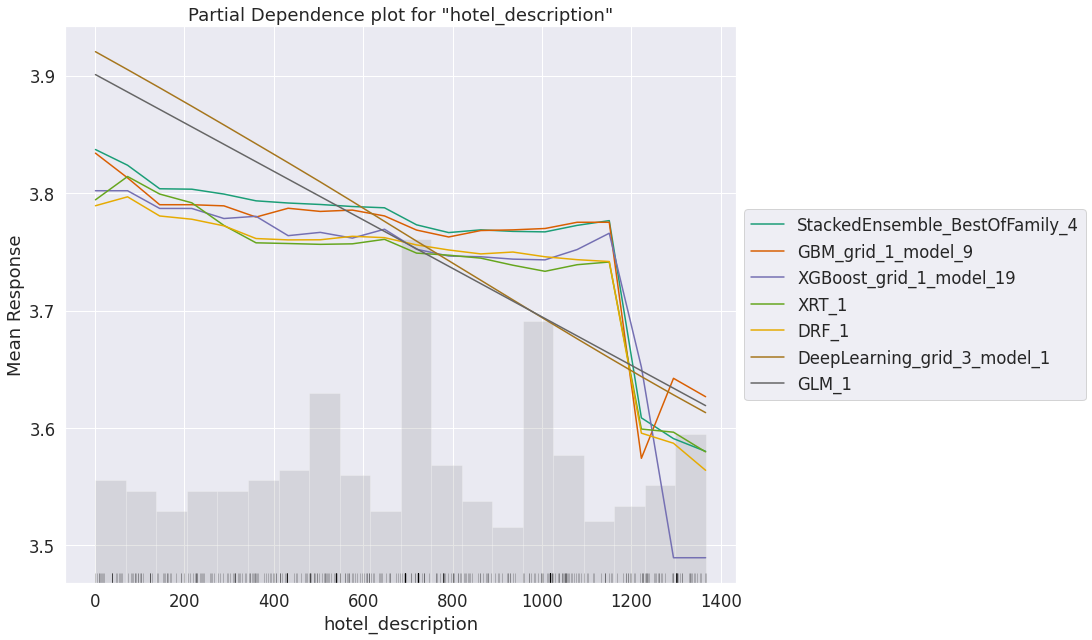

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

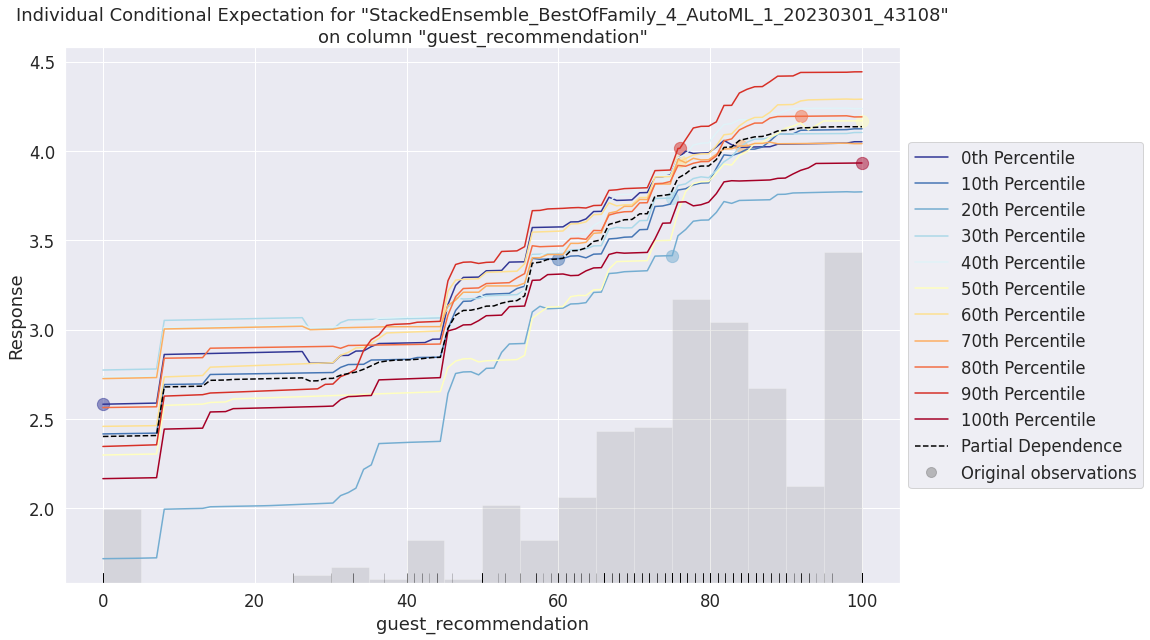

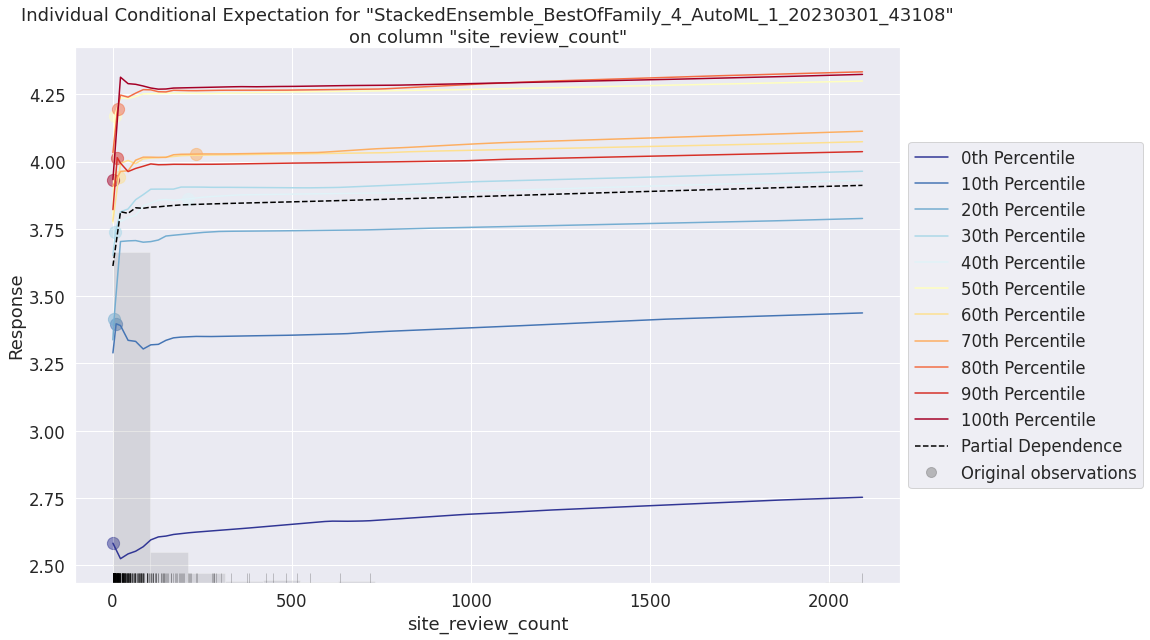

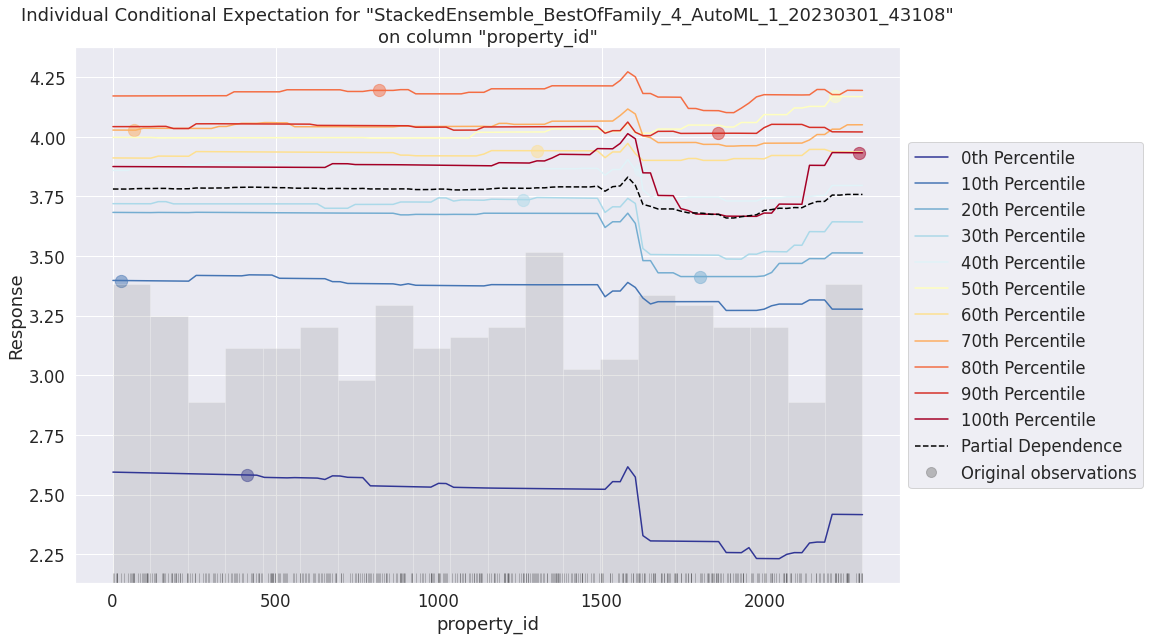

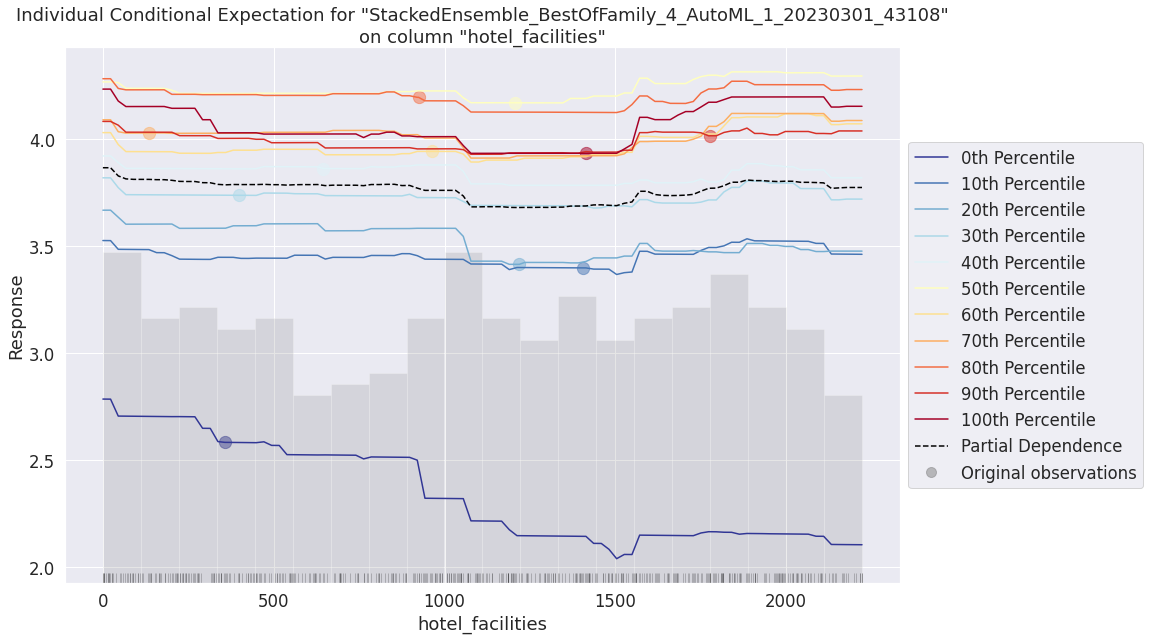

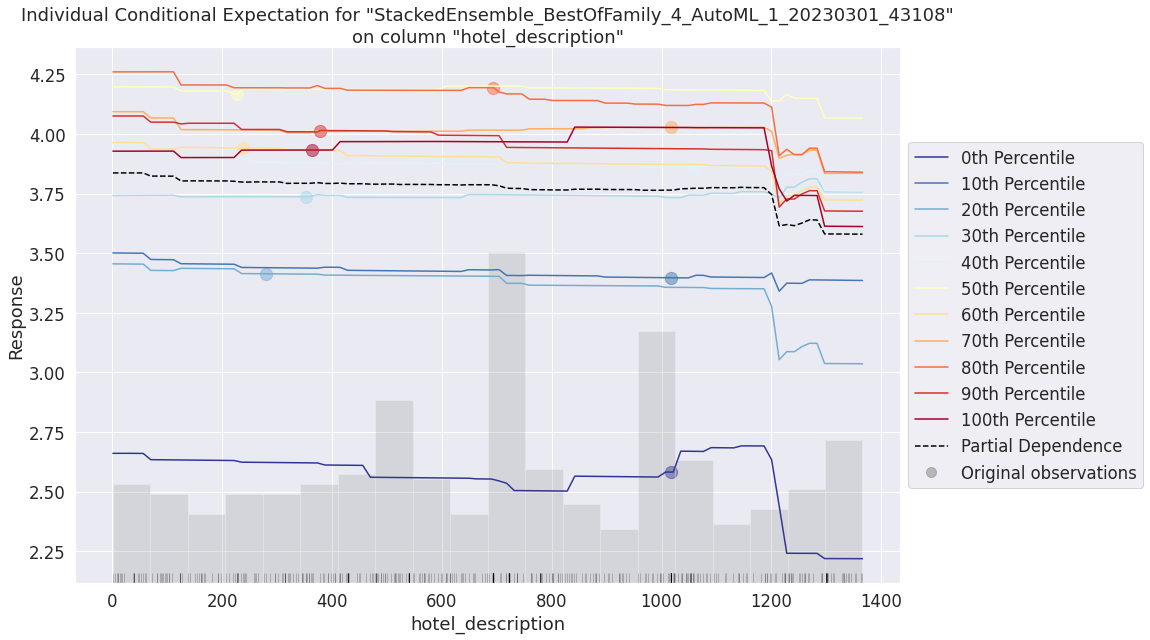

In [53]:
exa = aml.explain(df_test)

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [54]:

#Seperating the predictor and target variables
A=dff.drop(['site_review_rating'],axis=1)
B=dff['site_review_rating']

In [55]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [56]:

cols1 = ['address','area','city','guest_recommendation','latitude','hotel_description','longitude','hotel_facilities','property_id','property_name','property_type','room_count','room_type','site_review_count','state','uniq_id']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [57]:

b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [58]:

residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.4411639346456457e-15


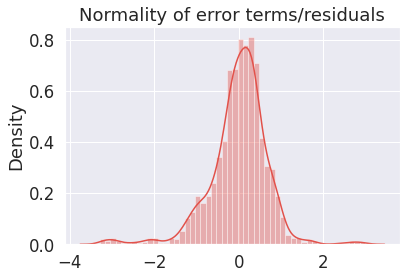

In [59]:

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

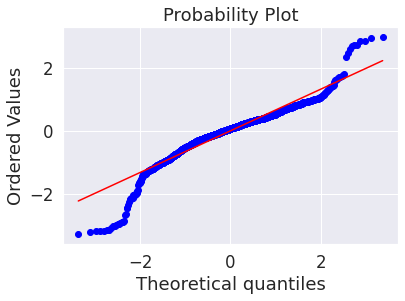

In [60]:

import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='site_review_rating', ylabel='Count'>

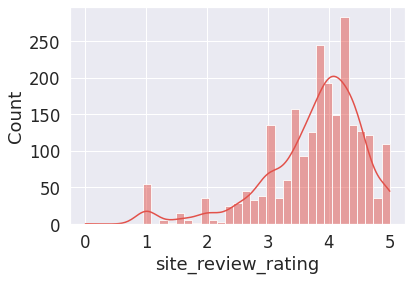

In [61]:

sns.histplot(dff.site_review_rating, kde = True)

# Analysing relation between all variables

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.



In [62]:
import statsmodels.formula.api as smf  # OLS model Library

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dff[['address','area','city','guest_recommendation','latitude','hotel_description','longitude','hotel_facilities','property_id','property_name','property_type','room_count','room_type','site_review_count','state','uniq_id']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif
     

variables        VIF
0                address   4.225448
1                   area   4.190047
2                   city   3.683299
3   guest_recommendation  12.464634
4               latitude   9.433637
5      hotel_description   5.131408
6              longitude  52.003115
7       hotel_facilities   4.447116
8            property_id   4.440623
9          property_name   4.087201
10         property_type  12.420311
11            room_count   1.065549
12             room_type   4.278493
13     site_review_count   1.380473
14                 state   5.841651
15               uniq_id   4.006000

In [64]:
import h2o

pandas_df = h2o.as_list(df)

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [65]:
results = smf.ols(
    "site_review_rating ~ area + city + guest_recommendation + latitude + hotel_facilities + address + hotel_description + longitude + property_id + property_name + property_type + room_count + room_type + site_review_count + state + uniq_id",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     site_review_rating   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     70.89
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          2.40e-186
Time:                        04:36:31   Log-Likelihood:                -2344.8
No. Observations:                2302   AIC:                             4724.
Df Residuals:                    2285   BIC:                             4821.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6847      0.269      9.987      0.000       2.158       3.212
area                 -5.007e-05   5.54e-05     -0.904      0.366      -0.000    5.86e-05
city                  7.838e-05      0.000      0.565      0.572      -0.000       0.000
guest_recommendation     0.0199      0.001     31.030      0.000       0.019       0.021
latitude                -0.0009      0.002     -0.471      0.638      -0.005       0.003
hotel_facilities     -3.532e-05    2.3e-05     -1.533      0.126   -8.05e-05    9.87e-06
address               1.205e-05   2.17e-05      0.554      0.580   -3.06e-05    5.47e-05
hotel_description       -0.0002   3.95e-05     -4.485      0.000      -0.000   -9.97e-05
longitude               -0.0015      0.003     -0.480      0.632      -0.008       0.005
property_id             -0.0001   2.23e-05     -6.456      0.000      -0.000      -0.000
property_name         6.339e-05   2.26e-05      2.806      0.005    1.91e-05       0.000
property_type            0.0026      0.006      0.464      0.643      -0.008       0.013
room_count            4.577e-05      0.000      0.408      0.683      -0.000       0.000
room_type            -4.836e-05   6.09e-05     -0.794      0.427      -0.000    7.11e-05
site_review_count        0.0006      0.000      4.013      0.000       0.000       0.001
state                   -0.0023      0.002     -1.085      0.278      -0.006       0.002
uniq_id              -2.969e-05   2.12e-05     -1.403      0.161   -7.12e-05    1.18e-05
==============================================================================
Omnibus:                      474.346   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2469.727
Skew:                          -0.876   Prob(JB):                         0.00
Kurtosis:                       7.762   Cond. No.                     5.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [66]:

s = dff['site_review_rating']

t = dff.drop(['site_review_rating'], axis = 1)

In [67]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [68]:

t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results

In [69]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [70]:

random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 800}

## Conclusion

A regression-based model was developed to forecast hotel prices. To exclude some of the independent variables, tests such as VIF and p-values were taken into account. The H20.ai framework was utilized to train and test the hotel dataset variables on goibibo. The 'gbm' model yielded the highest accuracy of 51% on the test data. The findings indicate that the proposed linear regression model can successfully analyze and predict hotel ratings to a certain degree, but the predictive accuracy is still limited in some cases. Further investigations into alternative models can enhance the model's performance, such as removing outliers and using booster techniques.

# Assignment Question/Answers

Q1)Is the relationship significant?
To determine if the relationship is significant between the variables, we can look at the p-values in the table.If a variable has a low p-value (typically less than 0.05), it is considered statistically significant, meaning that there is evidence that the variable has a relationship with the response variable (in this case, hotel rating). Looking at the p-values from the OLS method, it was observed that guest_recommendation, property_id, property_name, and site_review_count all have very low p-values (less than 0.05), indicating that they are statistically significant and have a relationship with site_review_rating.
The other variables (area, city, latitude, longitude, property_type, room_count, room_type, state, and uniq_id) have higher p-values, indicating that they are not statistically significant and do not have a significant relationship with hotel rating.

Q2)Are any model assumptions violated?
1.Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2.Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

3.No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between 

4.No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.996, therefore this assumption is not violated.

Q3)Is there any multicollinearity in the model?
When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. 

Q4)In the multivariate models are predictor variables independent of all the other predictor variables?
Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that guest_recommendation and site_review_rating is highly correlated correlated to each other. Other than those other predictors are independent from each other.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
From the variable importance plot, the most to least important variables are displayed. For my model guest_recommendation, property_id, site_review_count and hotel_facilities are top 4 most important variables to determine site_review_ratings.

Q6)Does the model make sense?
For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.67 which is considered okay in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?
This question is answered above.

Q8)Which independent variables are significant?
Variables are significant when p-value is less than 0.05. For this model except for guest_recommendation, property_id, property_name, hotel_description and site_review_count all other variables have p-value greater than 0.05. So, it can be said that all variables are not significant.

Q9)Which hyperparameters are important?
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 800, 'min_samples_split': 2 and 'n_estimators': 400



## LICENSE
MIT License

Copyright (c) 2022 Bhavanish Dhamnaskar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## REFERENCES

W3schools

Generate 'n' unique random numbers within a range

A Complete Guide to Dealing with Missing values in Python

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML